In [11]:
import pandas as pd
import numpy as np
import random
import ipaddress
import datetime

# Function to generate random IP address
def generate_random_ip():
    return ipaddress.IPv4Address(random.randint(2*32, 2*33 - 1))

# Generate dummy data
data1 = {'ID': list(range(1, 101)),
        'ERRORCODE': [random.choice([502, 1008, 527]) for _ in range(100)],
        'Is_aua_called': [random.choice(['yes', 'no']) for _ in range(100)],
        'Auth_modalities': [random.choice(['F', 'D']) for _ in range(100)],
        'Ver_Api': ['2.5' for _ in range(100)],
        'Sub_Aua_ip': [str(generate_random_ip()) for _ in range(100)],
        'Txn_code': [datetime.datetime.now() - datetime.timedelta(days=x) for x in range(100)],
        'Response_code': [random.choice(['Y', 'N']) for _ in range(100)],
        'DevicesRDSID': [random.choice(['M', 'S']) for _ in range(100)],
        'Device_mi': [random.choice(['MI', 'MOS']) for _ in range(100)]}

# Create DataFrame
data = pd.DataFrame(data1)

# Save as CSV
data.to_csv('unlabeled_dummy_dataset.csv', index=False)

In [12]:
data

,ID,ERRORCODE,Is_aua_called,Auth_modalities,Ver_Api,Sub_Aua_ip,Txn_code,Response_code,DevicesRDSID,Device_mi
0,1,1008,no,F,2.5,0.0.0.64,2024-03-06 15:19:33.590677,Y,S,MOS
1,2,1008,no,D,2.5,0.0.0.65,2024-03-05 15:19:33.590677,Y,M,MOS
2,3,1008,yes,D,2.5,0.0.0.64,2024-03-04 15:19:33.590677,Y,M,MI
3,4,1008,no,D,2.5,0.0.0.65,2024-03-03 15:19:33.590677,N,M,MOS
4,5,527,no,F,2.5,0.0.0.65,2024-03-02 15:19:33.590677,N,S,MOS
...,...,...,...,...,...,...,...,...,...,...
95,96,1008,no,D,2.5,0.0.0.65,2023-12-02 15:19:33.590677,N,M,MOS
96,97,502,yes,D,2.5,0.0.0.65,2023-12-01 15:19:33.590677,N,M,MI
97,98,502,no,F,2.5,0.0.0.65,2023-11-30 15:19:33.590677,Y,S,MOS
98,99,502,no,D,2.5,0.0.0.64,2023-11-29 15:19:33.590677,Y,S,MOS


# Understand and Prepare the Data

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               100 non-null    int64         
 1   ERRORCODE        100 non-null    int64         
 2   Is_aua_called    100 non-null    object        
 3   Auth_modalities  100 non-null    object        
 4   Ver_Api          100 non-null    object        
 5   Sub_Aua_ip       100 non-null    object        
 6   Txn_code         100 non-null    datetime64[ns]
 7   Response_code    100 non-null    object        
 8   DevicesRDSID     100 non-null    object        
 9   Device_mi        100 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 7.9+ KB


In [14]:
data.info

<bound method DataFrame.info of      ID  ERRORCODE Is_aua_called Auth_modalities Ver_Api Sub_Aua_ip  \
0     1       1008            no               F     2.5   0.0.0.64   
1     2       1008            no               D     2.5   0.0.0.65   
2     3       1008           yes               D     2.5   0.0.0.64   
3     4       1008            no               D     2.5   0.0.0.65   
4     5        527            no               F     2.5   0.0.0.65   
..  ...        ...           ...             ...     ...        ...   
95   96       1008            no               D     2.5   0.0.0.65   
96   97        502           yes               D     2.5   0.0.0.65   
97   98        502            no               F     2.5   0.0.0.65   
98   99        502            no               D     2.5   0.0.0.64   
99  100        502           yes               D     2.5   0.0.0.64   

                     Txn_code Response_code DevicesRDSID Device_mi  
0  2024-03-06 15:19:33.590677             Y   

In [15]:
data.shape

(100, 10)

In [16]:
data.describe

<bound method NDFrame.describe of      ID  ERRORCODE Is_aua_called Auth_modalities Ver_Api Sub_Aua_ip  \
0     1       1008            no               F     2.5   0.0.0.64   
1     2       1008            no               D     2.5   0.0.0.65   
2     3       1008           yes               D     2.5   0.0.0.64   
3     4       1008            no               D     2.5   0.0.0.65   
4     5        527            no               F     2.5   0.0.0.65   
..  ...        ...           ...             ...     ...        ...   
95   96       1008            no               D     2.5   0.0.0.65   
96   97        502           yes               D     2.5   0.0.0.65   
97   98        502            no               F     2.5   0.0.0.65   
98   99        502            no               D     2.5   0.0.0.64   
99  100        502           yes               D     2.5   0.0.0.64   

                     Txn_code Response_code DevicesRDSID Device_mi  
0  2024-03-06 15:19:33.590677             Y 

In [17]:
data.isnull().sum()

ID                 0
ERRORCODE          0
Is_aua_called      0
Auth_modalities    0
Ver_Api            0
Sub_Aua_ip         0
Txn_code           0
Response_code      0
DevicesRDSID       0
Device_mi          0
dtype: int64

# import library which required

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.cluster import AgglomerativeClustering
from numpy.linalg import eig

# Visualizing  data 

<Axes: >

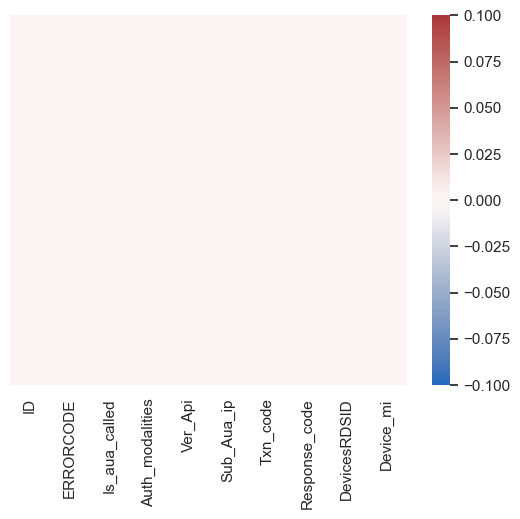

In [19]:
sns.heatmap(data.isnull(), yticklabels=False, cmap="vlag")

,ID,ERRORCODE,Txn_code
0,1,502,2024-03-06 15:11:33.386075
1,2,502,2024-03-05 15:11:33.386075
2,3,1008,2024-03-04 15:11:33.386075
3,4,1008,2024-03-03 15:11:33.386075
4,5,1008,2024-03-02 15:11:33.386075
...,...,...,...
95,96,1008,2023-12-02 15:11:33.386075
96,97,502,2023-12-01 15:11:33.386075
97,98,527,2023-11-30 15:11:33.386075
98,99,527,2023-11-29 15:11:33.386075


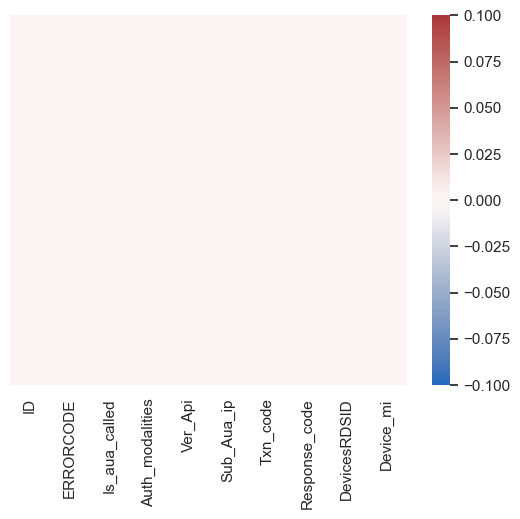

In [20]:
sns.heatmap(data.isnull(), yticklabels=False, cmap="vlag")
num_data=df.select_dtypes(exclude="object")
num_data

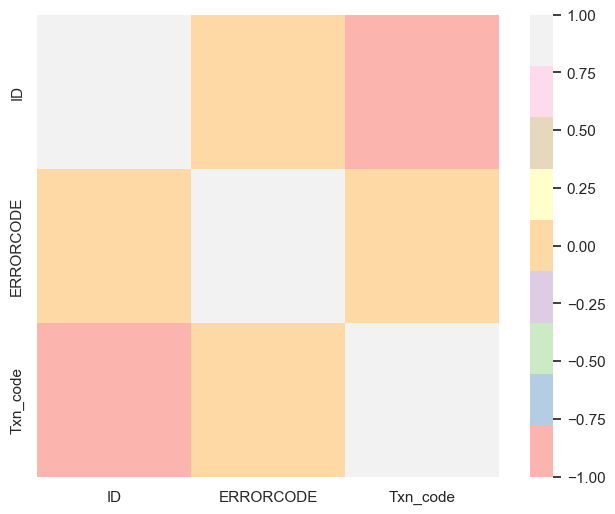

In [21]:
#Examaning a correlation matrix of all the features
corrmat=num_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corrmat,cmap="Pastel1",square=True)
plt.show()

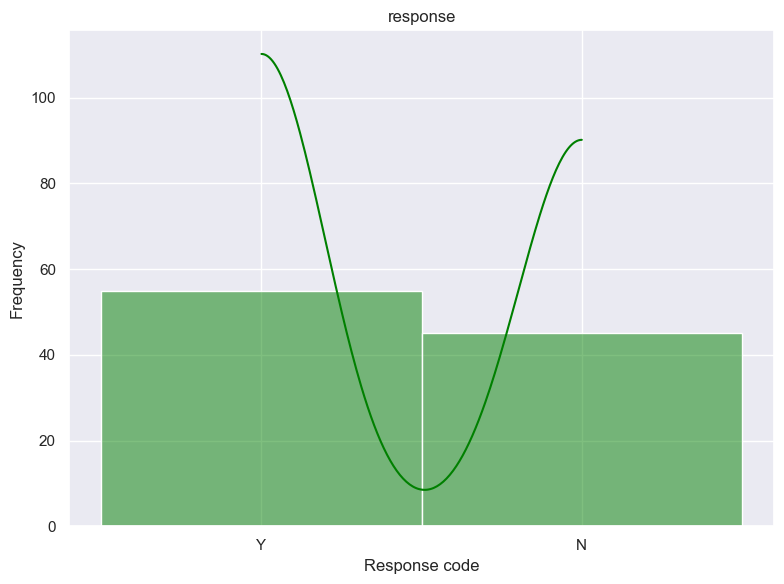

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Response_code'], bins=20, color='green', kde=True)
plt.xlabel('Response code')
plt.ylabel('Frequency')
plt.title('response')
plt.show()

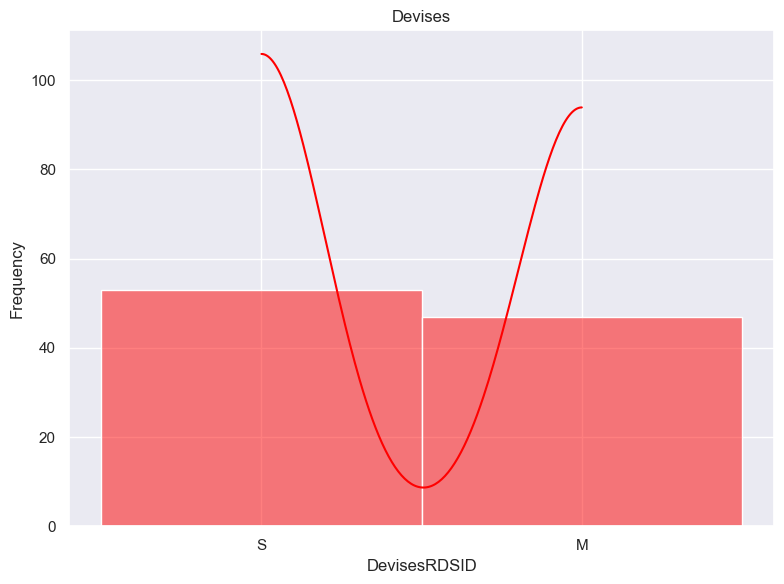

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(data['DevicesRDSID'], bins=20, color='red', kde=True)
plt.xlabel('DevisesRDSID')
plt.ylabel('Frequency')
plt.title('Devises')
plt.tight_layout()
plt.show()

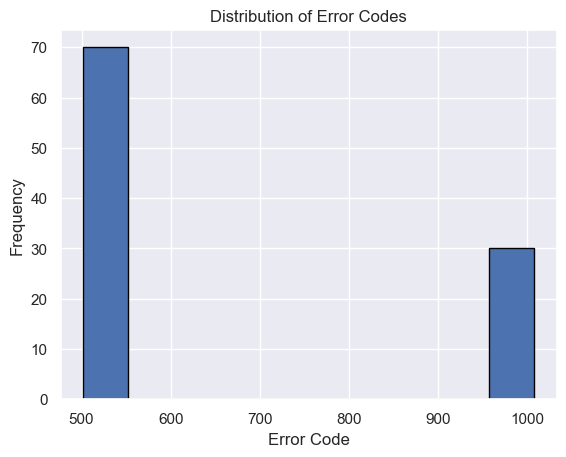

In [25]:
plt.hist(data['ERRORCODE'], bins=10, edgecolor='black')
plt.xlabel('Error Code')
plt.ylabel('Frequency')
plt.title('Distribution of Error Codes')
plt.show()

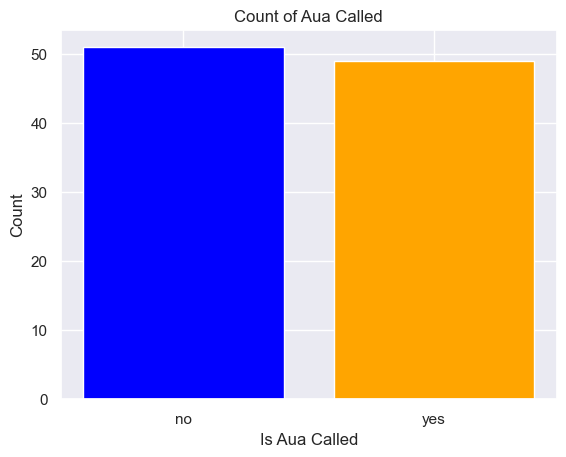

In [26]:
plt.bar(data['Is_aua_called'].unique(), data['Is_aua_called'].value_counts(), color=['blue', 'orange'])
plt.xlabel('Is Aua Called')
plt.ylabel('Count')
plt.title('Count of Aua Called')
plt.show()

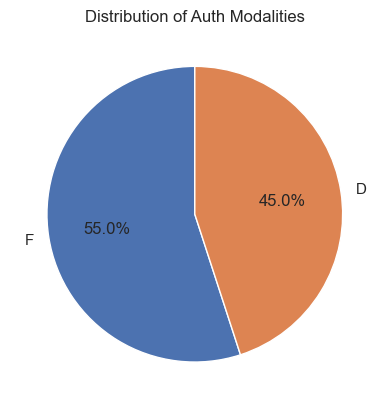

In [27]:
plt.pie(data['Auth_modalities'].value_counts(), labels=data['Auth_modalities'].unique(), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Auth Modalities')
plt.show()

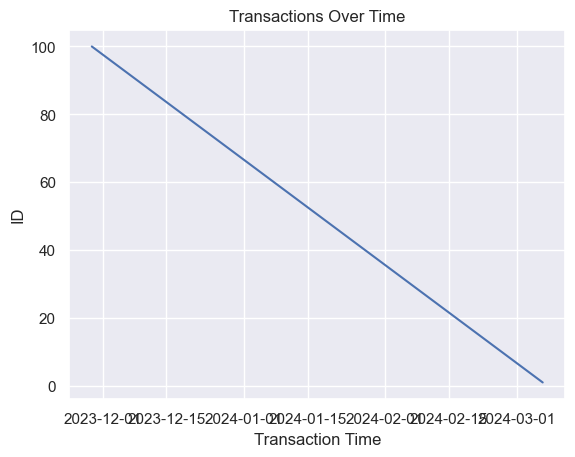

In [28]:
plt.plot(data['Txn_code'], data['ID'])
plt.xlabel('Transaction Time')
plt.ylabel('ID')
plt.title('Transactions Over Time')
plt.show()

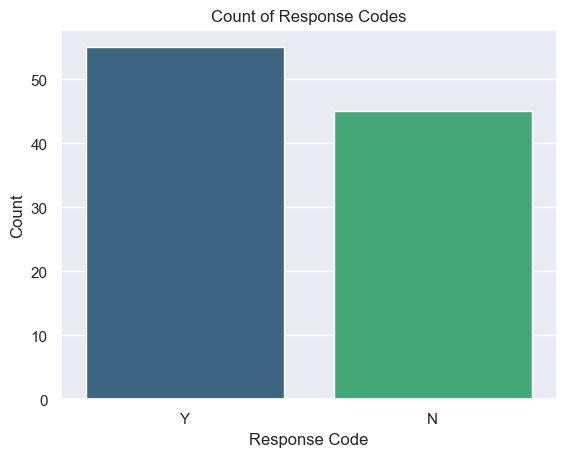

In [29]:

sns.countplot(x='Response_code', data=data, palette='viridis')
plt.xlabel('Response Code')
plt.ylabel('Count')
plt.title('Count of Response Codes')
plt.show()

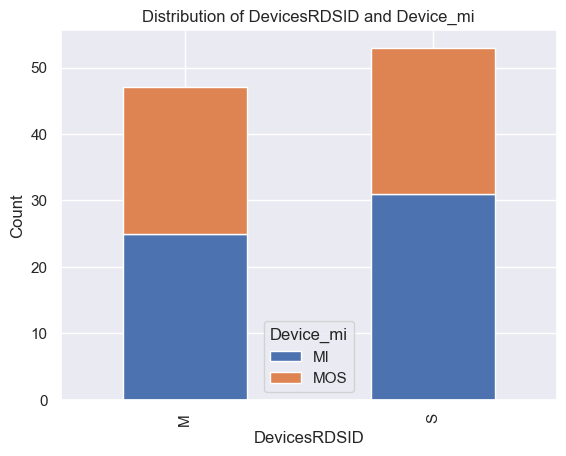

In [30]:
pd.crosstab(data['DevicesRDSID'], data['Device_mi']).plot(kind='bar', stacked=True)
plt.xlabel('DevicesRDSID')
plt.ylabel('Count')
plt.title('Distribution of DevicesRDSID and Device_mi')
plt.show()

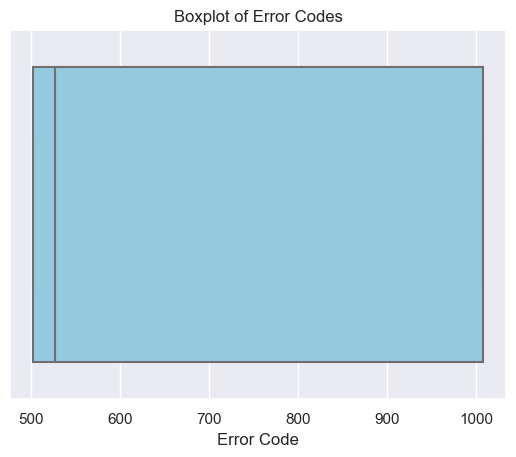

In [35]:
sns.boxplot(x='ERRORCODE', data=data, color='skyblue')
plt.xlabel('Error Code')
plt.title('Boxplot of Error Codes')
plt.show()

C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


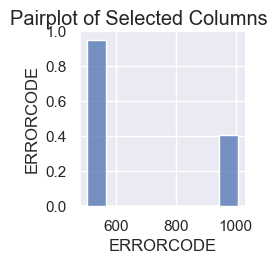

In [37]:
sns.pairplot(data[['ERRORCODE', 'Is_aua_called', 'DevicesRDSID', 'Response_code']])
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()

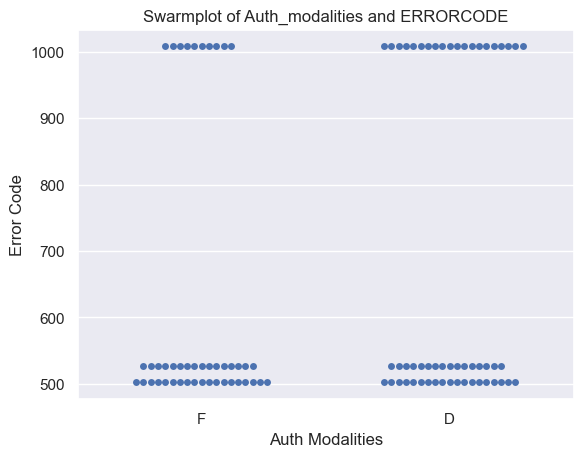

In [39]:
sns.swarmplot(x='Auth_modalities', y='ERRORCODE', data=data)
plt.xlabel('Auth Modalities')
plt.ylabel('Error Code')
plt.title('Swarmplot of Auth_modalities and ERRORCODE')
plt.show()

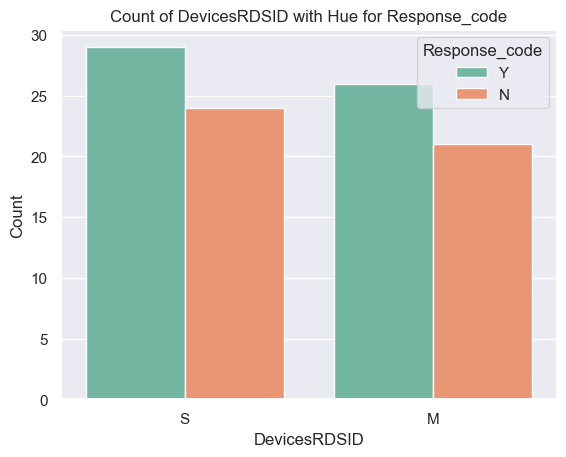

In [42]:
sns.countplot(x='DevicesRDSID', hue='Response_code', data=data, palette='Set2')
plt.xlabel('DevicesRDSID')
plt.ylabel('Count')
plt.title('Count of DevicesRDSID with Hue for Response_code')
plt.show()

# Building a model 

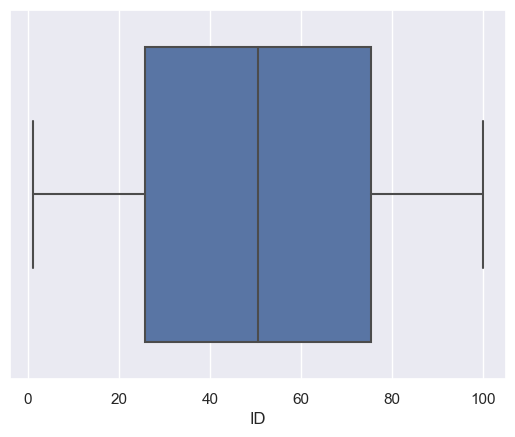

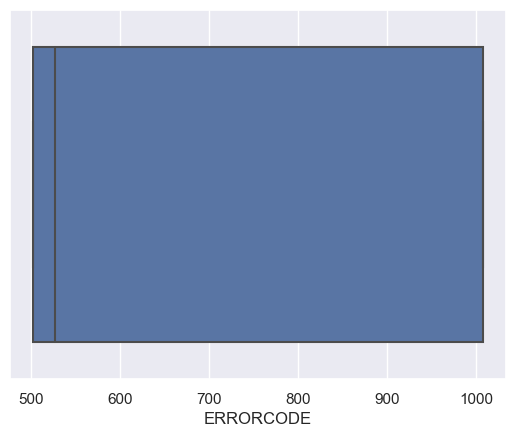

In [44]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
for i in numeric_columns:
 sns.boxplot(x=data[i])
 plt.show()
def detect_outliers_iqr(data,threshold=1.5):
 Q1=np.percentile(data,25)
 Q3=np.percentile(data,75)
 iQR=Q3-Q1
 lower_bound=Q1-threshold*IQR
 upperbound=Q3+threshold*IQR
 return np.where((data< lower_bound)|(data>upper_bound))

In [45]:
data1

{'ID': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100],
 'ERRORCODE': [1008,
  1008,
  1008,
  1008,
  527,
  1008,
  1008,
  502,
  502,
  527,
  527,
  527,
  527,
  502,
  527,
  527,
  1008,
  1008,
  1008,
  527,
  502,
  502,
  502,
  1008,
  502,
  527,
  502,
  1008,
  527,
  502,
  527,
  527,
  527,
  527,
  1008,
  527,
  1008,
  1008,
  527,
  1008,
  502,
  1008,
  527,
  502,
  502,
  502,
  502,
  502,
  527,
  502,
  502,
  1008,
  527,


In [46]:
data

,ID,ERRORCODE,Is_aua_called,Auth_modalities,Ver_Api,Sub_Aua_ip,Txn_code,Response_code,DevicesRDSID,Device_mi
0,1,1008,no,F,2.5,0.0.0.64,2024-03-06 15:19:33.590677,Y,S,MOS
1,2,1008,no,D,2.5,0.0.0.65,2024-03-05 15:19:33.590677,Y,M,MOS
2,3,1008,yes,D,2.5,0.0.0.64,2024-03-04 15:19:33.590677,Y,M,MI
3,4,1008,no,D,2.5,0.0.0.65,2024-03-03 15:19:33.590677,N,M,MOS
4,5,527,no,F,2.5,0.0.0.65,2024-03-02 15:19:33.590677,N,S,MOS
...,...,...,...,...,...,...,...,...,...,...
95,96,1008,no,D,2.5,0.0.0.65,2023-12-02 15:19:33.590677,N,M,MOS
96,97,502,yes,D,2.5,0.0.0.65,2023-12-01 15:19:33.590677,N,M,MI
97,98,502,no,F,2.5,0.0.0.65,2023-11-30 15:19:33.590677,Y,S,MOS
98,99,502,no,D,2.5,0.0.0.64,2023-11-29 15:19:33.590677,Y,S,MOS


In [47]:
df=data.drop(['Txn_code'],axis=1)

In [48]:
df

,ID,ERRORCODE,Is_aua_called,Auth_modalities,Ver_Api,Sub_Aua_ip,Response_code,DevicesRDSID,Device_mi
0,1,1008,no,F,2.5,0.0.0.64,Y,S,MOS
1,2,1008,no,D,2.5,0.0.0.65,Y,M,MOS
2,3,1008,yes,D,2.5,0.0.0.64,Y,M,MI
3,4,1008,no,D,2.5,0.0.0.65,N,M,MOS
4,5,527,no,F,2.5,0.0.0.65,N,S,MOS
...,...,...,...,...,...,...,...,...,...
95,96,1008,no,D,2.5,0.0.0.65,N,M,MOS
96,97,502,yes,D,2.5,0.0.0.65,N,M,MI
97,98,502,no,F,2.5,0.0.0.65,Y,S,MOS
98,99,502,no,D,2.5,0.0.0.64,Y,S,MOS


In [54]:
df.head(3)

,ID,ERRORCODE,Is_aua_called,Auth_modalities,Ver_Api,Sub_Aua_ip,Response_code,DevicesRDSID,Device_mi
0,1,1008,no,F,2.5,0.0.0.64,Y,S,MOS
1,2,1008,no,D,2.5,0.0.0.65,Y,M,MOS
2,3,1008,yes,D,2.5,0.0.0.64,Y,M,MI


In [56]:
categorical_cols=['Is_aua_called','Auth_modalities','Response_code','DevicesRDSID','Device_mi']
encoder=OneHotEncoder(drop='first',sparse=False)
encoder_cols=pd.DataFrame(encoder.fit_transform(df[categorical_cols]),columns=encoder.get_feature_names_out(categorical_cols))


C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [59]:
numerical_cols=['ID','ERRORCODE','Ver_Api']
scaler=StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(df[numerical_cols]),columns=scaler.get_feature_names_out(numerical_cols))

In [60]:
scaled_cols

,ID,ERRORCODE,Ver_Api
0,-1.714816,1.525913,0.0
1,-1.680173,1.525913,0.0
2,-1.645531,1.525913,0.0
3,-1.610888,1.525913,0.0
4,-1.576245,-0.594145,0.0
...,...,...,...
95,1.576245,1.525913,0.0
96,1.610888,-0.704336,0.0
97,1.645531,-0.704336,0.0
98,1.680173,-0.704336,0.0


In [61]:
encoder_cols

,Is_aua_called_yes,Auth_modalities_F,Response_code_Y,DevicesRDSID_S,Device_mi_MOS
0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,1.0
96,1.0,0.0,0.0,0.0,0.0
97,0.0,1.0,1.0,1.0,1.0
98,0.0,0.0,1.0,1.0,1.0


In [62]:
df1 = pd.concat([scaled_cols, encoder_cols], axis=1)

In [63]:
df1

,ID,ERRORCODE,Ver_Api,Is_aua_called_yes,Auth_modalities_F,Response_code_Y,DevicesRDSID_S,Device_mi_MOS
0,-1.714816,1.525913,0.0,0.0,1.0,1.0,1.0,1.0
1,-1.680173,1.525913,0.0,0.0,0.0,1.0,0.0,1.0
2,-1.645531,1.525913,0.0,1.0,0.0,1.0,0.0,0.0
3,-1.610888,1.525913,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.576245,-0.594145,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
95,1.576245,1.525913,0.0,0.0,0.0,0.0,0.0,1.0
96,1.610888,-0.704336,0.0,1.0,0.0,0.0,0.0,0.0
97,1.645531,-0.704336,0.0,0.0,1.0,1.0,1.0,1.0
98,1.680173,-0.704336,0.0,0.0,0.0,1.0,1.0,1.0


# Apply K means 

In [65]:
from sklearn.cluster import KMeans
#Elbow method

wcss = []

for i in range(1,25):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=70)
    kmeans.fit(df1)
    
    wcss.append(kmeans.inertia_)

C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a mem

C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a mem

In [66]:
wcss

[324.03999999999996,
 221.09888476202923,
 169.79655952177046,
 145.06794826778793,
 133.14960989976632,
 124.3457943805796,
 118.67746075654743,
 112.98497546561757,
 106.18949401706945,
 100.92989573746603,
 97.39528429283207,
 92.63318145778538,
 89.39337020784184,
 84.02450677684703,
 80.71446758730403,
 78.35357476065617,
 74.2655531075811,
 72.55753254131301,
 66.826877106686,
 62.570056663922216,
 61.45598668582166,
 60.01540786292749,
 56.914024341698266,
 56.40292059772998]

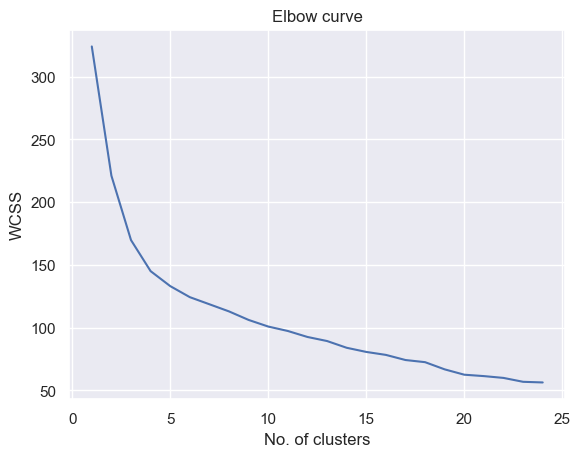

In [67]:
sns.set()
plt.plot(range(1,25),wcss)
plt.title('Elbow curve')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=70)
y=kmeans.fit_predict(df1)

C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [69]:
y

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [71]:
data_output = df1.copy(deep = True)
data_output['Class'] = kmeans.labels_
data_output.head()

,ID,ERRORCODE,Ver_Api,Is_aua_called_yes,Auth_modalities_F,Response_code_Y,DevicesRDSID_S,Device_mi_MOS,Class
0,-1.714816,1.525913,0.0,0.0,1.0,1.0,1.0,1.0,1
1,-1.680173,1.525913,0.0,0.0,0.0,1.0,0.0,1.0,1
2,-1.645531,1.525913,0.0,1.0,0.0,1.0,0.0,0.0,1
3,-1.610888,1.525913,0.0,0.0,0.0,0.0,0.0,1.0,1
4,-1.576245,-0.594145,0.0,0.0,1.0,0.0,1.0,1.0,0


# cluster size for kmenas

In [73]:
cluster_labels = kmeans.labels_
df_labels = pd.DataFrame(cluster_labels, columns=["Cluster"])
cluster_counts = df_labels.groupby('Cluster').size().to_frame()
cluster_counts.columns = ["FRAUD"]
print(cluster_counts)

         FRAUD
Cluster       
0           70
1           30


In [74]:
print(cluster_counts.shape[0])

2


In [86]:
data_output

,ID,ERRORCODE,Ver_Api,Is_aua_called_yes,Auth_modalities_F,Response_code_Y,DevicesRDSID_S,Device_mi_MOS,Class
0,-1.714816,1.525913,0.0,0.0,1.0,1.0,1.0,1.0,1
1,-1.680173,1.525913,0.0,0.0,0.0,1.0,0.0,1.0,1
2,-1.645531,1.525913,0.0,1.0,0.0,1.0,0.0,0.0,1
3,-1.610888,1.525913,0.0,0.0,0.0,0.0,0.0,1.0,1
4,-1.576245,-0.594145,0.0,0.0,1.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...
95,1.576245,1.525913,0.0,0.0,0.0,0.0,0.0,1.0,1
96,1.610888,-0.704336,0.0,1.0,0.0,0.0,0.0,0.0,0
97,1.645531,-0.704336,0.0,0.0,1.0,1.0,1.0,1.0,0
98,1.680173,-0.704336,0.0,0.0,0.0,1.0,1.0,1.0,0


In [87]:
np.unique(kmeans.labels_, return_counts=True) 

(array([0, 1]), array([70, 30], dtype=int64))

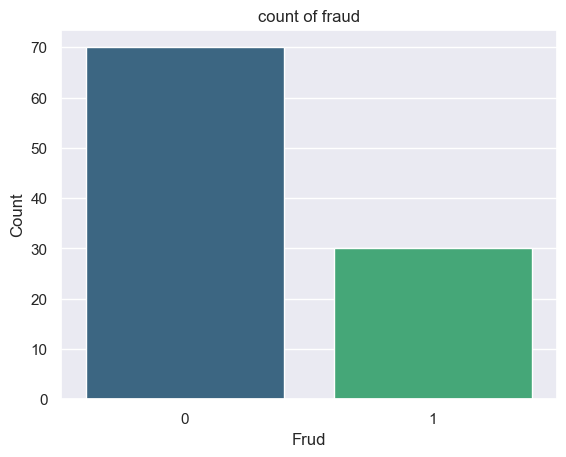

In [96]:
sns.countplot(x='Class', data=data_output, palette='viridis')
plt.xlabel('Frud')
plt.ylabel('Count')
plt.title('count of fraud')
plt.show()

# Silhouette_Score

In [98]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score
silhouette_avg = silhouette_score(df1, y)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3254917100085016


In [99]:
calinski_harabasz_index = calinski_harabasz_score(df1, y)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Calinski-Harabasz Index: 45.62768059268674


In [100]:
davies_bouldin_index = davies_bouldin_score(df1, y)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 1.3211462226892556


# dendrogram clustering

In [101]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage

In [104]:
Z=df1
z = sch.linkage(Z,method='ward')
z

array([[4.40000000e+01, 4.50000000e+01, 3.46427483e-02, 2.00000000e+00],
       [3.10000000e+01, 3.20000000e+01, 3.46427483e-02, 2.00000000e+00],
       [8.20000000e+01, 8.40000000e+01, 6.92854967e-02, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.15507545e-01, 2.00000000e+00],
       [4.60000000e+01, 4.80000000e+01, 1.30162795e-01, 2.00000000e+00],
       [5.20000000e+01, 5.60000000e+01, 1.38570993e-01, 2.00000000e+00],
       [8.30000000e+01, 8.80000000e+01, 1.73213742e-01, 2.00000000e+00],
       [2.10000000e+01, 2.50000000e+01, 1.77041784e-01, 2.00000000e+00],
       [6.60000000e+01, 7.50000000e+01, 3.11784735e-01, 2.00000000e+00],
       [7.70000000e+01, 1.06000000e+02, 3.40017001e-01, 3.00000000e+00],
       [6.10000000e+01, 7.20000000e+01, 3.81070232e-01, 2.00000000e+00],
       [8.50000000e+01, 9.60000000e+01, 3.96681729e-01, 2.00000000e+00],
       [2.70000000e+01, 3.90000000e+01, 4.15712980e-01, 2.00000000e+00],
       [5.80000000e+01, 7.10000000e+01, 4.50355728e

Text(0.5, 1.0, 'Hierarchical Clustering')

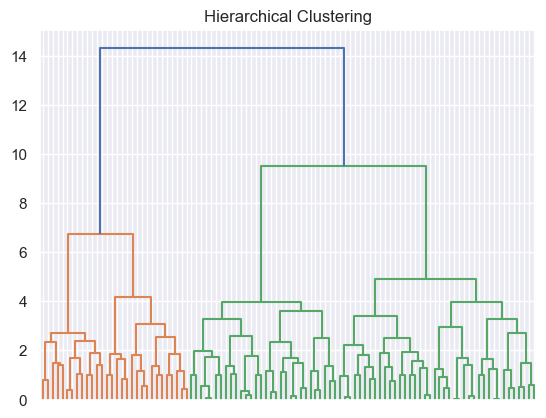

In [105]:
den = sch.dendrogram(z)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 
plt.title('Hierarchical Clustering')

# AgglomerativeClustering

In [106]:
from sklearn.cluster import AgglomerativeClustering

In [107]:
hc_model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

In [108]:
y_cluster = hc_model.fit_predict(Z)

C:\Users\DD\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [109]:
y_cluster

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [111]:
data_out = Z.copy(deep = True)
data_out['FRAUD'] = hc_model.labels_
data_out.head()

,ID,ERRORCODE,Ver_Api,Is_aua_called_yes,Auth_modalities_F,Response_code_Y,DevicesRDSID_S,Device_mi_MOS,FRAUD
0,-1.714816,1.525913,0.0,0.0,1.0,1.0,1.0,1.0,1
1,-1.680173,1.525913,0.0,0.0,0.0,1.0,0.0,1.0,1
2,-1.645531,1.525913,0.0,1.0,0.0,1.0,0.0,0.0,1
3,-1.610888,1.525913,0.0,0.0,0.0,0.0,0.0,1.0,1
4,-1.576245,-0.594145,0.0,0.0,1.0,0.0,1.0,1.0,0


In [112]:
np.unique(hc_model.labels_, return_counts=True)

(array([0, 1], dtype=int64), array([70, 30], dtype=int64))

In [113]:
silhouette_avg = silhouette_score(Z, y_cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3254917100085016


In [114]:
calinski_harabasz_index = calinski_harabasz_score(Z, y_cluster)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Calinski-Harabasz Index: 45.62768059268674


In [115]:
davies_bouldin_index = davies_bouldin_score(Z, y_cluster)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 1.3211462226892556
